In [1]:
import numpy as np
import pandas as pd
import cmath
%matplotlib widget
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

### Import

In [2]:
inc15_scan30_TE = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\2oct\\inc_theta_-15deg_scan30_TE\\30deg.s1p',
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])
inc15_scan30_TM = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\2oct\\inc_theta_-15deg_scan30_TM\\30deg.s1p',
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])
inc0_scan30_TE = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\2oct\\inc_theta_0deg_scan30\\30deg.s1p',
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])

In [3]:
inc15_scan30_TE_screen = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\2oct\\inc_theta_-15deg_scan30_TE\\screen.s1p',
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])
inc15_scan30_TM_screen = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\2oct\\inc_theta_-15deg_scan30_TM\\screen.s1p',
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])
inc0_scan30_TE_screen = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\2oct\\inc_theta_0deg_scan30\\screen.s1p',
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])

inc15_scan30_TE_free = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\2oct\\inc_theta_-15deg_scan30_TE\\free.s1p',
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])
inc15_scan30_TM_free = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\2oct\\inc_theta_-15deg_scan30_TM\\free.s1p',
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])
inc0_scan30_TE_free = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\2oct\\inc_theta_0deg_scan30\\free.s1p',
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])

In [4]:
inc15_scan30_TE['s12'] = inc15_scan30_TE['ReS12'] + 1j*inc15_scan30_TE['ImS12']
inc15_scan30_TM['s12'] = inc15_scan30_TM['ReS12'] + 1j*inc15_scan30_TM['ImS12']
inc0_scan30_TE['s12'] = inc0_scan30_TE['ReS12'] + 1j*inc0_scan30_TE['ImS12']

inc15_scan30_TE_screen['s12'] = inc15_scan30_TE_screen['ReS12'] + 1j*inc15_scan30_TE_screen['ImS12']
inc15_scan30_TM_screen['s12'] = inc15_scan30_TM_screen['ReS12'] + 1j*inc15_scan30_TM_screen['ImS12']
inc0_scan30_TE_screen['s12'] = inc0_scan30_TE_screen['ReS12'] + 1j*inc0_scan30_TE_screen['ImS12']

inc15_scan30_TE_free['s12'] = inc15_scan30_TE_free['ReS12'] + 1j*inc15_scan30_TE_free['ImS12']
inc15_scan30_TM_free['s12'] = inc15_scan30_TM_free['ReS12'] + 1j*inc15_scan30_TM_free['ImS12']
inc0_scan30_TE_free['s12'] = inc0_scan30_TE_free['ReS12'] + 1j*inc0_scan30_TE_free['ImS12']

In [5]:
inc0_scan30_TE = inc0_scan30_TE.drop(['ReS12', 'ImS12'], axis=1)
inc15_scan30_TE = inc15_scan30_TE.drop(['ReS12', 'ImS12'], axis=1)
inc15_scan30_TM = inc15_scan30_TM.drop(['ReS12', 'ImS12'], axis=1)

inc0_scan30_TE_screen = inc0_scan30_TE_screen.drop(['ReS12', 'ImS12'], axis=1)
inc15_scan30_TE_screen = inc15_scan30_TE_screen.drop(['ReS12', 'ImS12'], axis=1)
inc15_scan30_TM_screen = inc15_scan30_TM_screen.drop(['ReS12', 'ImS12'], axis=1)

inc0_scan30_TE_free = inc0_scan30_TE_free.drop(['ReS12', 'ImS12'], axis=1)
inc15_scan30_TE_free = inc15_scan30_TE_free.drop(['ReS12', 'ImS12'], axis=1)
inc15_scan30_TM_free = inc15_scan30_TM_free.drop(['ReS12', 'ImS12'], axis=1)

In [6]:
# plt.plot(inc0_scan30_TE['Frequency'], 20*np.log10(np.abs(inc0_scan30_TE['s12'])), label='ris')
# plt.plot(inc0_scan30_TE_screen['Frequency'], 20*np.log10(np.abs(inc0_scan30_TE_screen['s12'])), label='screen')
# plt.plot(inc0_scan30_TE_free['Frequency'], 20*np.log10(np.abs(inc0_scan30_TE_free['s12'])), label='free')
# plt.legend()
# plt.show()

### Time-Gating

In [7]:
time_gating = True
N_fft = 2 ** 22 # количиство точек во временной области
# Должно иметь степень двойки для большей скорости и быть большем, чем количество частотных точек
T_max = 1 / (inc0_scan30_TE['Frequency'][1]-inc0_scan30_TE['Frequency'][0]) # продолжительность измеряемого импульса, определяется из количества измеряемых частотных точек
print(T_max)
time = T_max*np.linspace(0, 1, N_fft) # набор точек во временной области
time[-1] # последний элемент

5e-07


5e-07

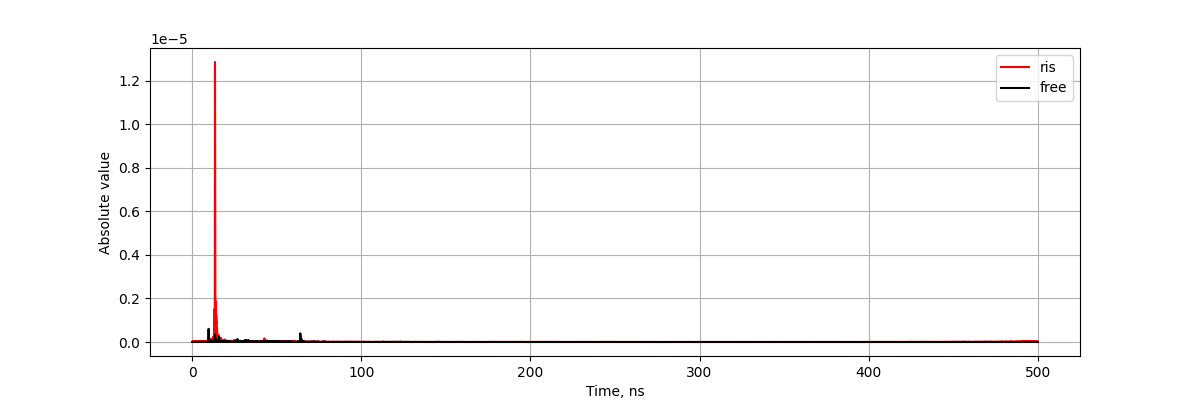

In [8]:
fig3 = plt.figure(figsize=(12,4))

ax_1 = fig3.add_subplot(111)
ax_1.plot(time*1e9, abs(ifft(inc15_scan30_TM['s12'].to_numpy(), n=N_fft)),'r', label='ris')
ax_1.plot(time*1e9, abs(ifft(inc15_scan30_TM_free['s12'].to_numpy(), n=N_fft)),'k', label='free')

ax_1.set_xlabel("Time, ns")
ax_1.set_ylabel("Absolute value")
ax_1.legend()
ax_1.grid()

In [9]:
gate_s21 = np.array([[0, 12], [15, 900]])*1e-9 # заполнить промежутками времени, которые необходимо вырезать в нс

In [10]:
def time_gate_s_param(gate: np.ndarray, s_par: pd.core.series.Series, n=N_fft, time=time):
    s = s_par.to_numpy()
    time_dom_s = pd.Series(ifft(s, n=n))
    for k in range(gate.shape[0]):
        if len(gate[k, :]) != 0:
            numbers = (time >= gate[k, 0]) & (time <= gate[k, 1])
            time_dom_s.loc[numbers] = 0
            #print(time_dom_s.head())
    s_new = fft(time_dom_s.to_numpy())
    s_new = s_new[0:len(inc0_scan30_TE['Frequency'])]
    return pd.Series(s_new)

In [11]:
if time_gating == True:
    s21_ris_0_30_TE = time_gate_s_param(gate= np.array([[0, 12], [15, 900]])*1e-9, s_par=inc0_scan30_TE['s12'])
    s21_free_0_30_TE = time_gate_s_param(gate= np.array([[0, 12], [15, 900]])*1e-9, s_par=inc0_scan30_TE_free['s12'])

    s21_ris_15_30_TE = time_gate_s_param(gate= gate_s21, s_par=inc15_scan30_TE['s12'])
    s21_free_15_30_TE = time_gate_s_param(gate= gate_s21, s_par=inc15_scan30_TE_free['s12'])

    s21_ris_15_30_TM = time_gate_s_param(gate= gate_s21, s_par=inc15_scan30_TM['s12'])
    s21_free_15_30_TM = time_gate_s_param(gate= gate_s21, s_par=inc15_scan30_TM_free['s12'])

### PLots

In [12]:
norm_0_30_TE = np.max(np.abs(s21_ris_0_30_TE-s21_free_0_30_TE))
norm_15_30_TE = np.max(np.abs(s21_ris_15_30_TE - s21_free_15_30_TE))
norm_15_30_TM = np.max(np.abs(s21_ris_15_30_TM - s21_free_15_30_TM))

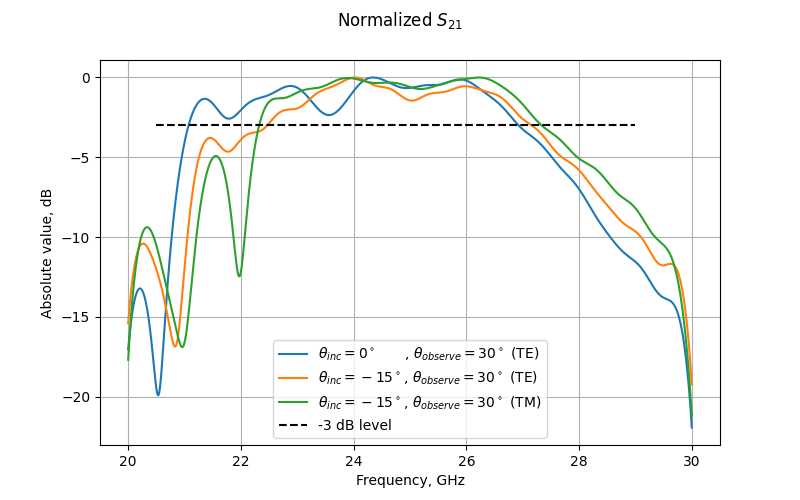

In [13]:
fig2 = plt.figure(figsize=(8,5))

ax_1 = fig2.add_subplot(111)
ax_1.plot(inc0_scan30_TE['Frequency']*1e-9, 20*np.log10(np.abs((s21_ris_0_30_TE-s21_free_0_30_TE) / norm_0_30_TE)),
          label=r'$\theta_{inc}=0^\circ \quad\quad$, $\theta_{observe}=30^\circ$ (TE)')
ax_1.plot(inc15_scan30_TE['Frequency']*1e-9, 20*np.log10(np.abs((s21_ris_15_30_TE-s21_free_15_30_TE) / norm_15_30_TE)),
          label=r'$\theta_{inc}=-15^\circ$, $\theta_{observe}=30^\circ$ (TE)')
ax_1.plot(inc15_scan30_TM['Frequency']*1e-9, 20*np.log10(np.abs((s21_ris_15_30_TM - s21_free_15_30_TM) / norm_15_30_TM)),
          label=r'$\theta_{inc}=-15^\circ$, $\theta_{observe}=30^\circ$ (TM)')
ax_1.plot([20.5, 29], [-3, -3], color='k', linestyle='--', label='-3 dB level')
ax_1.set_xlabel(r'Frequency, GHz')
ax_1.set_ylabel('Absolute value, dB')
ax_1.legend()
ax_1.grid()


fig2.suptitle(r'Normalized $S_{21}$')
plt.show()